In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [57]:
# Load the Excel file
file_path = '../data/diabetes_study_final_data.csv'
df = pd.read_csv(file_path, delimiter=',')

In [58]:
# Display the first few rows of the dataframe
df.head()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0


In [59]:
df.describe()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.380000,0.477000,1.888000,28.052368,105.053928,0.301111,0.150000
std,18.378666,0.499721,1.403362,3.743058,14.235055,0.435418,0.338917
min,18.000000,0.000000,0.000000,15.921951,70.000000,0.000000,0.000000
25%,35.000000,0.000000,1.000000,25.820978,96.149359,0.000000,0.000000
50%,50.000000,0.000000,2.000000,28.052368,105.053928,0.000000,0.000000
75%,66.000000,1.000000,3.000000,30.341792,113.705994,1.000000,0.000000
max,80.000000,1.000000,4.000000,40.772430,140.000000,1.000000,1.000000


In [60]:
# Check for missing values
pd.isnull(df).any()

Age                  False
Gender               False
Ethnicity            False
BMI                  False
BloodSugarLevel      False
InsulinResistance    False
GeneticFactor        False
dtype: bool

In [61]:
# Shows the data types of each column.
print(df.dtypes)

Age                    int64
Gender                 int64
Ethnicity              int64
BMI                  float64
BloodSugarLevel      float64
InsulinResistance    float64
GeneticFactor        float64
dtype: object


In [63]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 901
Number of distinct types in BloodSugarLevel: 887
Number of distinct types in InsulinResistance: 3
Number of distinct types in GeneticFactor: 3


In [64]:
# Impute Insulin Resistance with kNN

from sklearn.neighbors import KNeighborsClassifier
# Replace non-0/1 values with NaN for the InsulinResistance column
df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = df[df['InsulinResistance'].isna()]
df_complete = df.dropna(subset=['InsulinResistance'])

# Features and target for KNN
X = df_complete.drop(columns='InsulinResistance')
y = df_complete['InsulinResistance']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

# Predict the missing values
df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()

# Check for a certain value in the 'InsulinResistance' column
value_to_check = 0.3011111111111111
exists = value_to_check in df_combined['InsulinResistance'].values

print(f"Does the value {value_to_check} exist in 'InsulinResistance' column? {exists}")
df = df_combined

Does the value 0.3011111111111111 exist in 'InsulinResistance' column? False


/tmp/ipykernel_92784/3186694520.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))


In [65]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 901
Number of distinct types in BloodSugarLevel: 887
Number of distinct types in InsulinResistance: 2
Number of distinct types in GeneticFactor: 3


In [66]:
# Calculate the mean of the 'InsulinResistance' column
mean_value = df['GeneticFactor'].mean()

# Drop rows where 'InsulinResistance' equals the mean value
df = df[df['GeneticFactor'] != mean_value]

In [67]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 816
Number of distinct types in BloodSugarLevel: 797
Number of distinct types in InsulinResistance: 2
Number of distinct types in GeneticFactor: 2


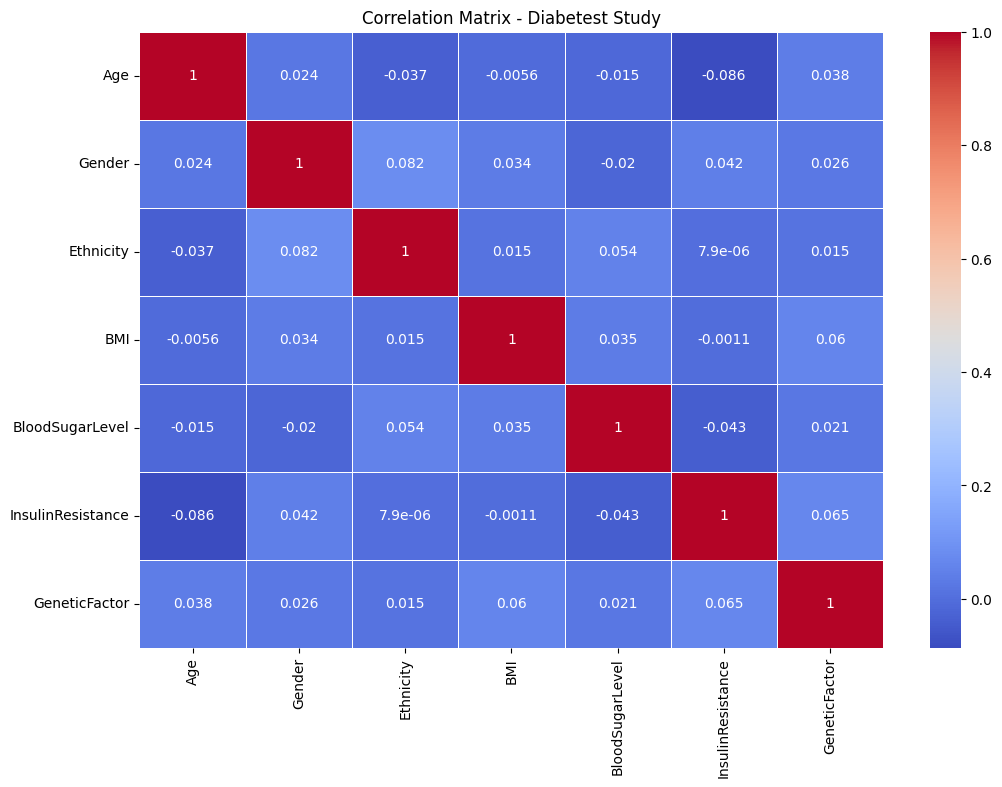

In [69]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

In [73]:
df.loc[:, 'BMI'] = (df['BMI'] * 100).astype(int)
df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel'] * 100).astype(int)

In [74]:



X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [75]:
# TPOT



# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2, random_state=42)
tpot.fit(training_features, training_target)
print(tpot.score(testing_features, testing_target))
tpot.export('tpot_diabetes_pipeline_classifier.py')

                                                                               
Generation 1 - Current best internal CV score: 0.8459259259259259
                                                                                 
Generation 2 - Current best internal CV score: 0.8459259259259259
Optimization Progress:   7%|▋         | 168/2550 [01:35<10:03,  3.94pipeline/s]